# CONOCIMIENTO DE LOS DATOS

## Planteamiento del problema

Bob ha fundado su propia empresa de telefonía móvil y busca competir con gigantes del mercado como Apple, Samsung, etc. Para abordar este desafío, se han recopilado datos de ventas de teléfonos móviles de diversas empresas y se busca identificar patrones y relaciones entre las características técnicas de los dispositivos.

En este contexto altamente competitivo, estimar el precio de venta de los teléfonos móviles es crucial para el éxito de su empresa.

¿Cuál es el mejor modelo predictivo para estimar los rangos de precios de teléfonos móviles, basado en características técnicas?

El objetivo de este proyecto, es desarrollar un modelo predictivo que pueda asignar a cada teléfono móvil un rango de precios, para proporcionar una guía clara sobre cómo posicionar los productos en el mercado. Esta predicción de rango de precios ayudará a Bob, a tomar decisiones estratégicas fundamentadas en datos, optimizando así sus estrategias de precios y su competitividad en el mercado de telefonía móvil.

## Variables del Dataset
- battery_power: Energía total que una batería puede almacenar en un tiempo medida en mAh
- blue: Tiene bluetooth o no
- clock_speed: Velocidad a la que el microprocesador ejecuta instrucciones
- dual_sim: Tiene soporte dual sim o no
- fc: Megapíxeles de la cámara frontal
- four_g: Tiene 4G o no
- int_memory: Memoria interna en Gigabytes
- m_dep: Profundidad del móvil en cm
- mobile_wt: Peso del teléfono móvil
- n_cores: Número de núcleos de procesador
- pc: Megapíxeles de la cámara principal
- px_height: Altura de resolución de píxeles
- px_width: Ancho de resolución de píxeles
- ram: Memoria de acceso aleatorio en megabytes
- sc_h: Altura de pantalla del móvil en cm
- sc_w: Ancho de pantalla del móvil en cm
- talk_time: mayor tiempo que durará una sola carga de batería cuando estés en llamada
- three_g: Tiene 3G o no
- touch_screen: Tiene pantalla táctil o no
- wifi: Tiene wifi o no
- price_range: Esta es la variable objetivo con valor de 0 (bajo costo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

Dataset "train" lo llamaremos "df_mobile_market" que hace referencia a los datos de ventas de teléfonos móviles, que Bob a recopilado, de diversas empresas

Dataset "test" lo llamaremos "df_feature_mobile" que hace referencia a los todos los telefonos a los cuales se necesita asignar un rango de precio

## Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings

In [2]:
# Desactivar las alertas

warnings.filterwarnings('ignore')

In [3]:
# Mostar todas las columnas de los DataFrame

pd.set_option('display.max_columns', None)

## Importar datos

In [6]:
# Importar las datasets

df_mobile_market = pd.read_csv(r'C:\Users\nuria\OneDrive\Escritorio\Data Science\Fundamentals\online_ds_thebridge_nuria\Analisis_de_datos\ML\Precios_Telefonia\train (1).csv')
df_feature_mobile = pd.read_csv(r'C:\Users\nuria\OneDrive\Escritorio\Data Science\Fundamentals\online_ds_thebridge_nuria\Analisis_de_datos\ML\Precios_Telefonia\test (1).csv', index_col = 'id')

# Visualizar DataFrame df_mobile_market
df_mobile_market.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
# Visualizar DataFrame df_feature_mobile
df_feature_mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


## ANÁLISI EXPLORATORIO DE DATOS

In [8]:
df_mobile_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df_feature_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_screen 

In [10]:
# Visualizar datos en blanco del DataFrame df_mobile_market

datos_blanco = pd.DataFrame({
    'Registros en Blanco' : df_mobile_market.isna().sum(),
    '% Registros en Blanco' : df_mobile_market.isna().sum()/len(df_mobile_market)
})

datos_blanco

,Registros en Blanco,% Registros en Blanco
battery_power,0,0.0
blue,0,0.0
clock_speed,0,0.0
dual_sim,0,0.0
fc,0,0.0
four_g,0,0.0
int_memory,0,0.0
m_dep,0,0.0
mobile_wt,0,0.0
n_cores,0,0.0


In [11]:
# Visualizar datos en blanco del DataFrame df_feature_mobile

datos_blanco2 = pd.DataFrame({
    'Registros en Blanco' : df_feature_mobile.isna().sum(),
    '% Registros en Blanco' : df_feature_mobile.isna().sum()/len(df_mobile_market)
})

datos_blanco2

,Registros en Blanco,% Registros en Blanco
battery_power,0,0.0
blue,0,0.0
clock_speed,0,0.0
dual_sim,0,0.0
fc,0,0.0
four_g,0,0.0
int_memory,0,0.0
m_dep,0,0.0
mobile_wt,0,0.0
n_cores,0,0.0


In [12]:
#Visualizar los valores distintos de las variables categoricas del DataFrame df_mobile_market

var_cat_mobile_market = df_mobile_market[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range', 'n_cores']]

unique_counts_mobile_market = var_cat_mobile_market.nunique()
unique_values_mobile_market = var_cat_mobile_market.apply(lambda x: x.unique())

pd.DataFrame({'Frequency': unique_counts_mobile_market, 'Unique Values': unique_values_mobile_market})

,Frequency,Unique Values
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"


In [13]:
#Visualizar los valores distintos de las variables categoricas del DataFrame df_feature_mobile

var_cat_feature_mobile = df_feature_mobile[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']]

unique_counts_feature_mobile = var_cat_feature_mobile.nunique()
unique_values_feature_mobile = var_cat_feature_mobile.apply(lambda x: x.unique())

pd.DataFrame({'Frequency': unique_counts_feature_mobile, 'Unique Values': unique_values_feature_mobile})

,Frequency,Unique Values
blue,2,"[1, 0]"
dual_sim,2,"[1, 0]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[1, 0]"
wifi,2,"[0, 1]"
n_cores,8,"[3, 5, 8, 6, 2, 1, 7, 4]"


In [14]:
# Visualizar las descripcion estadistica de las variables numericas de df_mobile_market

var_num_mobile_market = df_mobile_market.drop(var_cat_mobile_market.columns, axis = 1)
var_num_mobile_market.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
pc,2000.0,9.9,6.1,0.0,5.0,10.0,15.0,20.0
px_height,2000.0,645.1,443.8,0.0,282.8,564.0,947.2,1960.0
px_width,2000.0,1251.5,432.2,500.0,874.8,1247.0,1633.0,1998.0
ram,2000.0,2124.2,1084.7,256.0,1207.5,2146.5,3064.5,3998.0


In [15]:
# Visualizar las descripcion estadistica de las variables numericas de df_feature_mobile

var_num_feature_mobile = df_feature_mobile.drop(var_cat_feature_mobile.columns, axis = 1)
var_num_feature_mobile.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
battery_power,1000.0,1248.5,432.5,500.0,895.0,1246.5,1629.2,1999.0
clock_speed,1000.0,1.5,0.8,0.5,0.7,1.5,2.3,3.0
fc,1000.0,4.6,4.5,0.0,1.0,3.0,7.0,19.0
int_memory,1000.0,33.7,18.1,2.0,18.0,34.5,49.0,64.0
m_dep,1000.0,0.5,0.3,0.1,0.3,0.5,0.8,1.0
mobile_wt,1000.0,139.5,34.9,80.0,109.8,139.0,170.0,200.0
pc,1000.0,10.1,6.1,0.0,5.0,10.0,16.0,20.0
px_height,1000.0,627.1,432.9,0.0,263.8,564.5,903.0,1907.0
px_width,1000.0,1239.8,439.7,501.0,831.8,1250.0,1637.8,1998.0
ram,1000.0,2139.0,1088.1,263.0,1237.2,2153.5,3065.5,3989.0


### Comentarios:
El DataFrame df_Mobile_market posee 2000 registros y el DataFrame df_feature_Mobile posee 1000 registros.
Ambos DataFrame no posee registros vacíos.
Ambos DataFrame posee las siguientes variables categóricas, a excepción de df_feature_mobile que no posee "price_range", debido a que es el set de datos al cual necesitamos predecir su rango de precio: blue, dual_sim, four_g, three_g, touch_screen, wifi, price_range y n_cores.
Ambos DataFrame poseen las siguientes variables numericas: blue, dual_sim, four_g, three_g, touch_screen, wifi, price_range y n_cores.

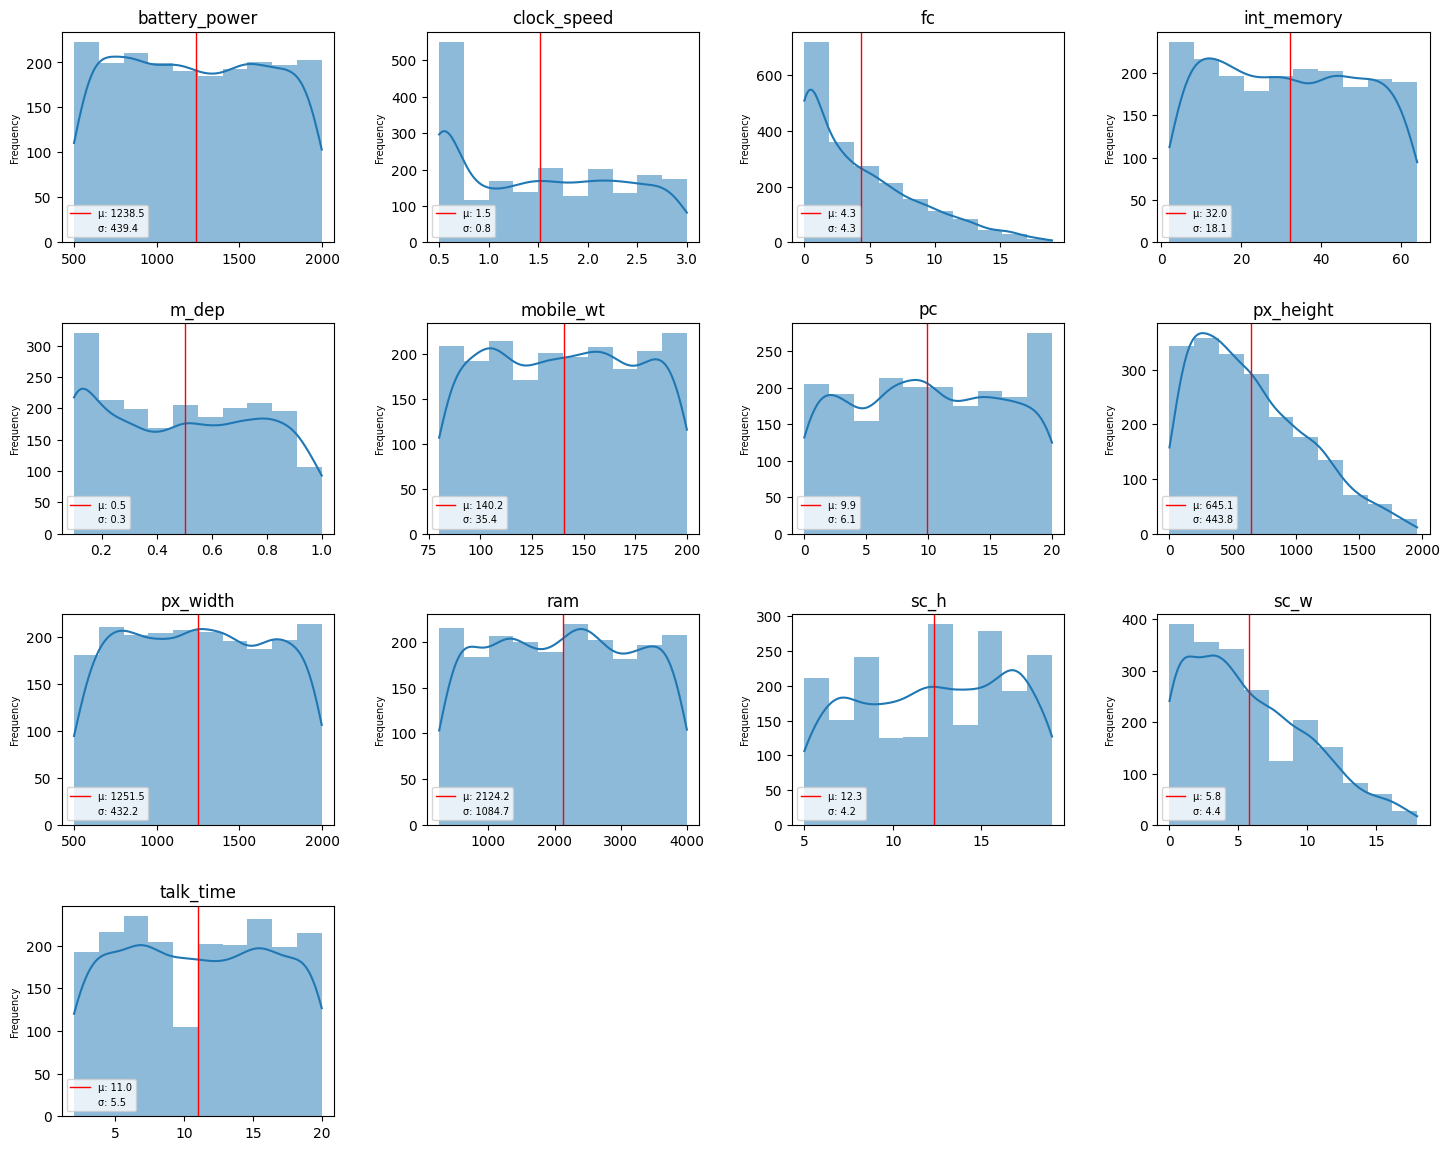

In [18]:
# Visualizar la distibucion de los datos de las variables numericas

columns = var_num_mobile_market.columns.tolist()

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))

for i, variable in enumerate(columns):
    row = i // 4
    col = i % 4

    sns.histplot(var_num_mobile_market[variable], bins=10, edgecolor = None, kde=True, ax = axes[row, col])

    mean_value = var_num_mobile_market[variable].mean()
    std_dev = var_num_mobile_market[variable].std()

    axes[row, col].axvline(mean_value, color='red', linewidth=1, label= f'µ: {mean_value:.1f}')
    axes[row, col].axvline(mean_value + std_dev, color='yellow', alpha = 0.0, linewidth=1, label= f'σ: {std_dev:.1f}')

    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Frequency', fontsize = 7)
    axes[row, col].set_title(variable)
    axes[row, col].legend(loc = 3, fontsize = 7)

plt.tight_layout(pad=2.5)

axes[3, 1].axis('off')
axes[3, 2].axis('off')
axes[3, 3].axis('off');

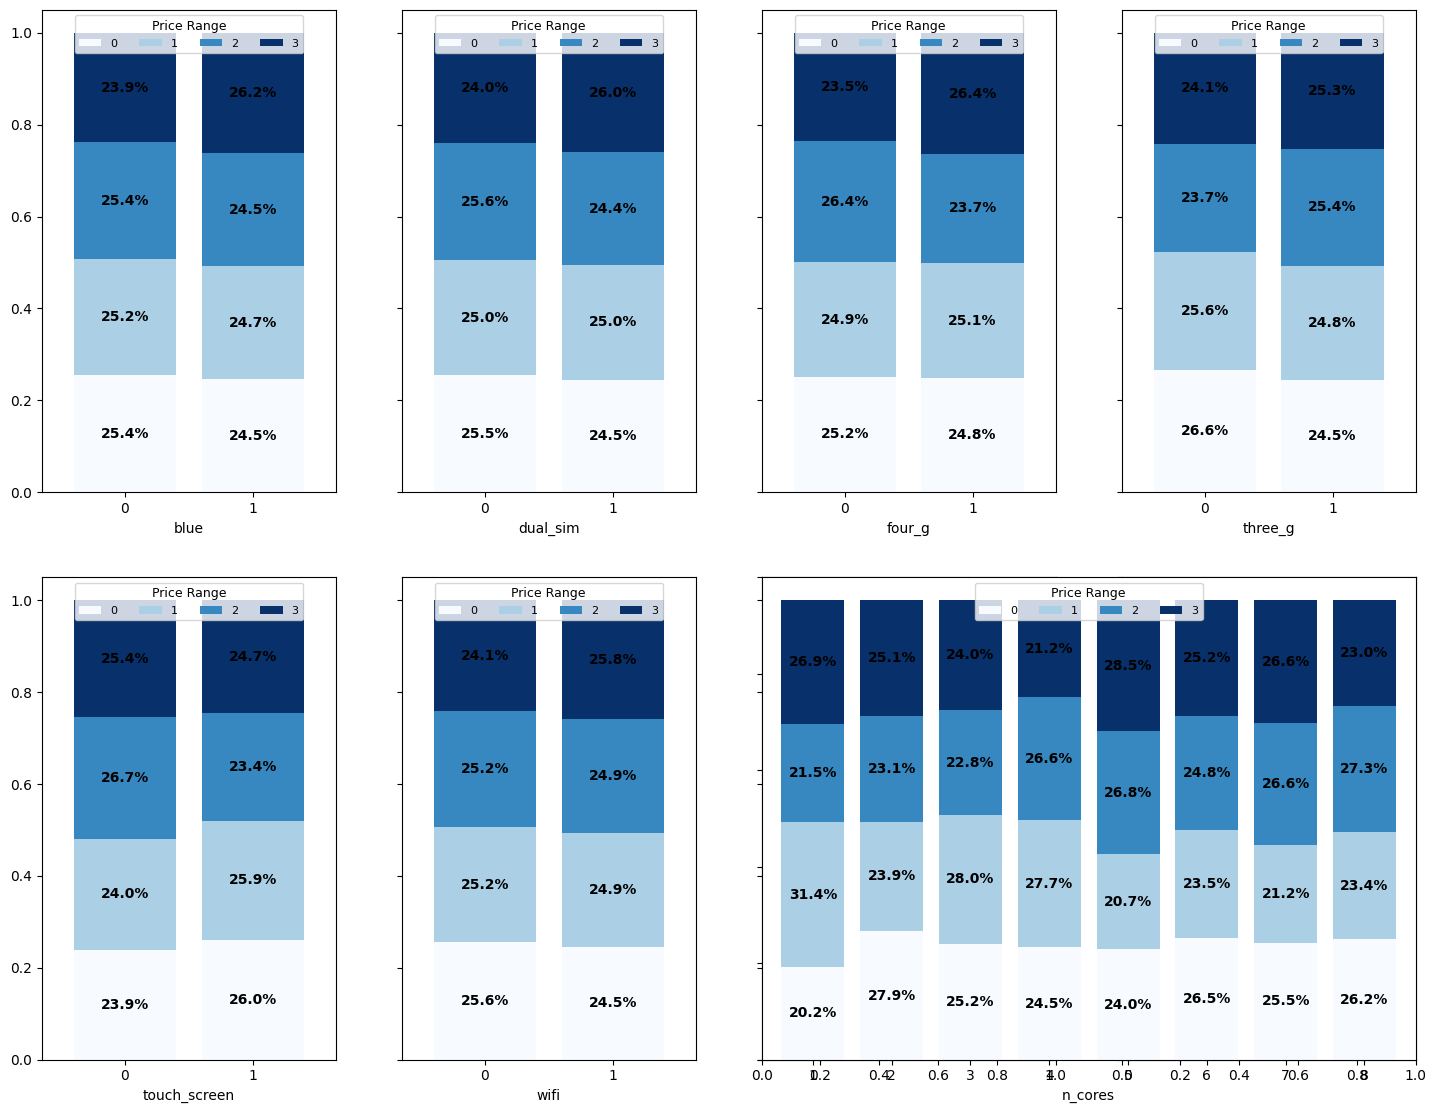

In [19]:
# Visualizar la distibucion de los datos de las variables categoricas

columns = var_cat_mobile_market.drop('price_range', axis = 1).columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 12))
axes[1,2] = plt.subplot2grid((2,4), (1,2), colspan=2)

plt.subplots_adjust(wspace=0.5, hspace=0.1)

for i, col in enumerate(columns):
    cross_tab = pd.crosstab(index=var_cat_mobile_market[col], columns=var_cat_mobile_market['price_range'])
    cross_tab_prop = pd.crosstab(index=var_cat_mobile_market[col], columns=var_cat_mobile_market['price_range'], normalize='index')

    row = i // 4
    col = i % 4

    cross_tab_prop.plot(kind = 'bar', stacked = True, width=0.8, colormap='Blues', sharey = True, ax = axes[row, col])

    for p in axes[row, col].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[row, col].annotate('{:.1f}%'.format(height*100), (x + width/2, y + height/2), ha='center', va='center', fontweight="bold")

    axes[row,col].legend(title = 'Price Range', ncol = 4, title_fontsize = 9, fontsize=8, loc = 9)
    axes[row,col].set_xticklabels(axes[row,col].get_xticklabels(), rotation=0)


plt.tight_layout(pad=3.0)

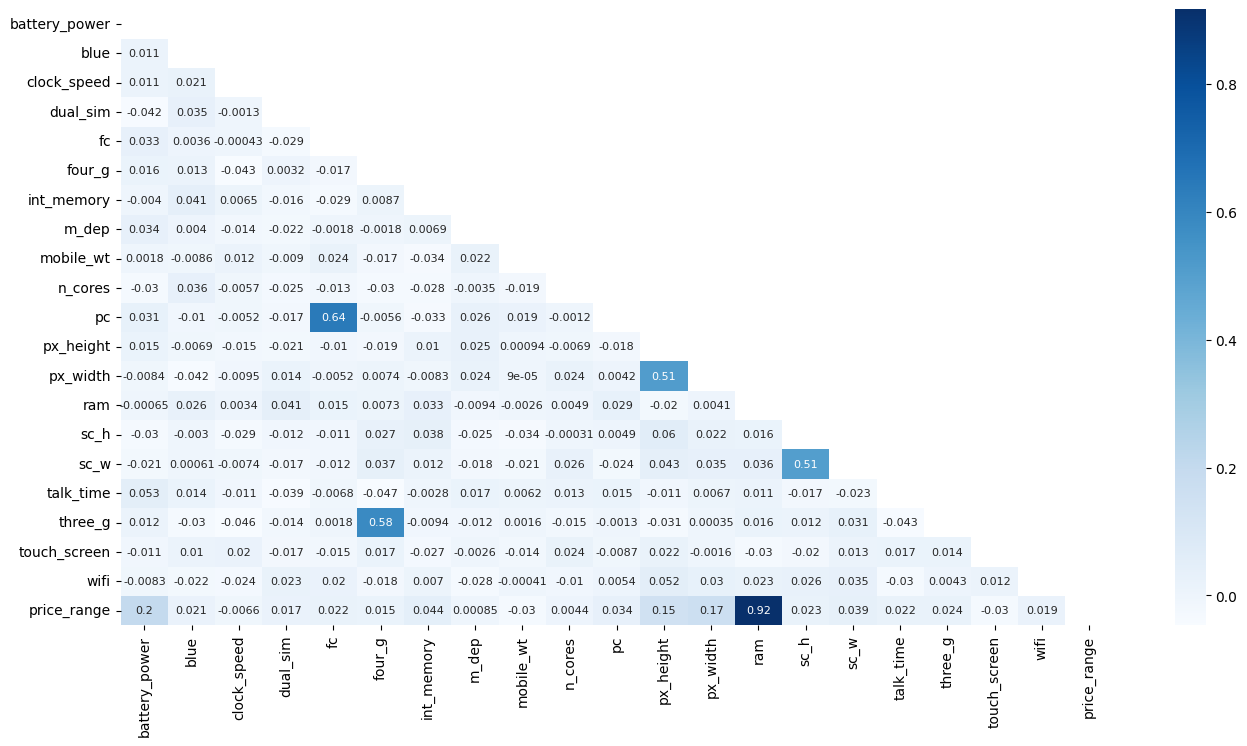

In [20]:
# Crear un heatmap para visualizar la correlacion entre variables del DataFrame df_mobile_market

matriz = df_mobile_market.corr(method = 'pearson')

mask = np.triu(np.ones_like(matriz, dtype=bool))

plt.figure(figsize=(16, 8))
ax = sns.heatmap(matriz,
                 annot = True,
                 cmap = 'Blues',
                 annot_kws={"fontsize":8},
                 mask = mask)

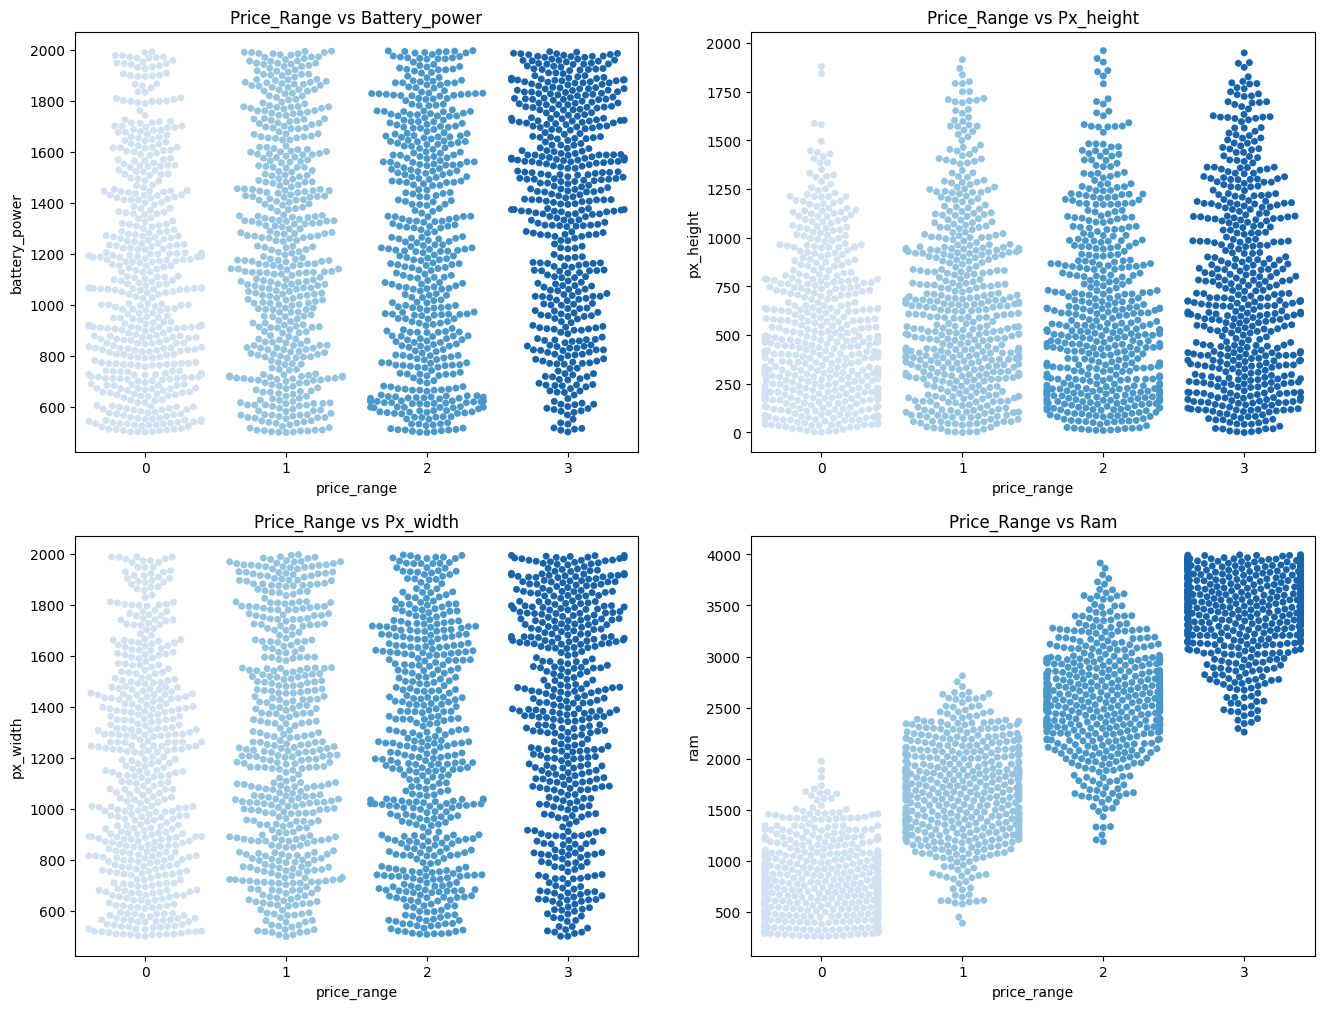

In [21]:
# Visualizar la distribucion de los datos de las variables con mayor correlación

variables = ['battery_power', 'px_height', 'px_width', 'ram']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 12))

for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2

    sns.swarmplot(x = 'price_range', y = variable, data = df_mobile_market, ax = axes[row, col], palette = 'Blues')
    axes[row, col].set_title(f'Price_Range vs {variable.capitalize()}');

### Comentarios:

- Al visualizar las variables numéricas, podemos darnos cuenta que la mayoría de las variables poseen datos distribuidos de manera normal. únicamente las variables fc, px_heigth y sc_w poseen una asimetría positiva. Esto significa que la mayoría de los dispositivos móviles poseen valores bajos y unos cuantos poseen valores muy altos. Estos valores altos pueden corresponder a modelos de gama alta o dispositivos específicos que se orientan a dichas variables.
- En cuanto a las variables categóricas, podemos observar que la distribución porcentual de los datos sigue un patrón similar en las categorías de cada variable en relación a su rango de precio. Sin embargo, podemos ver una variación significativa en la variable n_cores, específicamente en el rango de precio 1 y 2. Podríamos decir que el modelo podría tener dificultades para clasificar correctamente los teléfonos, en estos rangos de precios, en el caso que nos basáramos únicamente en esa variable.
- En el mapa de calor podemos ver que las variables battery_power, px_height, px_width, ram poseen una correlación significativa positiva, en especial la variable ram.
- Al visualizar en un swarmplot, las variables mencionadas en el punto anterior, podemos darnos cuenta de la alta correlación, o de la clara segmentación, de los precios en base a la ram. Esto significa que entre más ram posea un celular más alto será el precio.

## DEFINIR DATOS DE ENTRENAMIENTO Y PRUEBA

In [22]:
count_range_price = df_mobile_market.groupby('price_range').agg({'price_range':'count'})
count_range_price['% Frequency'] = (count_range_price.price_range/count_range_price.price_range.sum()) *100
count_range_price.rename(columns = {'price_range':'Frequency'})

,Frequency,% Frequency
price_range,,
0,500,25.0
1,500,25.0
2,500,25.0
3,500,25.0


In [23]:
# Dividir los datos de entrenamiento y prueba en la misma proporcion en ralacion a price_range

# Definir la distribucion de los datos
stratified = StratifiedShuffleSplit(n_splits =  1, test_size = 0.2, random_state = 11)

for index_train, index_test in stratified.split(df_mobile_market, df_mobile_market['price_range']):
    set_train = df_mobile_market.loc[index_train]
    set_test = df_mobile_market.loc[index_test]

In [24]:
set_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1753,995,0,1.3,1,1,0,10,0.1,104,4,3,258,1889,609,11,3,5,1,0,1,0
1763,994,0,1.2,1,4,0,40,0.9,164,2,17,296,839,3104,17,7,11,0,0,0,2
811,807,0,0.5,0,9,0,8,0.3,158,5,20,667,697,1284,17,13,2,0,1,1,0
1718,637,1,0.8,1,2,0,28,0.6,194,4,6,1080,1289,2725,15,10,7,0,0,0,2
1758,581,0,0.6,0,5,1,56,0.2,180,2,10,523,565,354,10,4,13,1,1,1,0


In [25]:
set_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
954,922,1,0.7,0,0,1,47,1.0,157,8,14,1295,1808,1464,17,4,12,1,0,1,1
1660,1559,1,1.3,1,10,1,10,0.3,114,8,17,117,681,2203,7,5,15,1,1,1,1
1242,989,1,1.6,1,11,1,24,0.6,156,8,17,614,679,2819,16,13,5,1,0,1,2
496,1554,1,0.5,1,11,0,5,1.0,124,3,12,395,1579,3635,7,4,18,0,0,0,3
1061,1522,1,0.7,1,4,0,28,0.2,124,1,5,952,1191,1368,14,5,17,1,0,1,1
